In [19]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = "../part4/data/malgun.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# Excel 데이터를 데이터프레임 변환 
df = pd.read_excel('../part4/data/시도별_전출입_인구수.xlsx')

# NaN 값을 바로 위의 값으로 변환
df = df.ffill()

# 데이터프레임 생략 안되게 설정
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [26]:
# to_choongnam : 충남 인구 유입량, choongnam_to : 충남 인구 유출량
mask_to_choongnam = (df['전입지별'] == '충청남도')
mask_choongnam_to = (df['전출지별'] == '충청남도') & (df['전입지별'] != '충청남도')

# ##################################충남 인구 유입량 처리#######################################
# df_to_choongnam : 충남 인구 유입량
df_to_choongnam = df[mask_to_choongnam]
df_to_choongnam = df_to_choongnam[1:]
df_to_choongnam = df_to_choongnam.drop(['전입지별'], axis=1)
df_to_choongnam = df_to_choongnam.rename({'전출지별' : '전출지'}, axis=1)
df_to_choongnam = df_to_choongnam.set_index('전출지')

# # '충남 유입량' index 추가
# df_to_choongnam.loc['충남 유입량', :] = 0

# # 빈칸 값 0으로 대체하기
# for i in range(len(df_to_choongnam['1970']) - 1):
#     for j in range(len(df_to_choongnam.iloc[0])):
#         if(df_to_choongnam.iloc[i,j] == '-'):
#             df_to_choongnam.iloc[i,j] = 0
            
# # 충남 유입량 계산
# for i in range(len(df_to_choongnam['1970']) - 1):
#     df_to_choongnam.loc['충남 유입량', :] += df_to_choongnam.iloc[i]
# ############################################################################################
# # df_choongnam_to : 충남 인구 유출량
# df_choongnam_to = df[mask_choongnam_to]
# df_choongnam_to = df_choongnam_to[1:]
# df_choongnam_to = df_choongnam_to.drop(['전출지별'], axis=1)
# df_choongnam_to = df_choongnam_to.rename({'전입지별' : '전입지'}, axis=1)
# df_choongnam_to = df_choongnam_to.set_index('전입지')

# # '충남 유출량' index 추가
# df_choongnam_to.loc['충남 유출량', :] = 0

# # 빈칸 값 0으로 대체하기
# for i in range(len(df_choongnam_to['1970']) - 1):
#     for j in range(len(df_choongnam_to.iloc[0])):
#         if(df_choongnam_to.iloc[i,j] == '-'):
#             df_choongnam_to.iloc[i,j] = 0


# # 충남 유출량 계산
# for i in range(len(df_choongnam_to['1970']) - 1):
#     df_choongnam_to.loc['충남 유출량', :] += df_choongnam_to.iloc[i]
# ##############################################################################################

df_to_choongnam

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전출지,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
서울특별시,15954,18943,23406,27139,25509,51205,41447,43993,48091,45388,54480,51369,48834,55344,50318,49520,47888,48678,49038,31707,29993,28211,26600,25958,22293,26501,27159,27395,25928,26726,23083,22056,21155,24942,30246,26012,25986,28898,27458,24889,24522,24723,22269,21486,21473,22299,21741,21020
부산광역시,1901,1994,1801,2255,2212,6467,4149,4584,5656,4526,5827,5644,5361,6103,5891,6087,5241,5584,5413,2841,2909,2826,2480,2582,2508,2982,3850,3757,3450,3508,3110,2997,3337,3748,4774,3752,3635,3741,3744,3738,3893,3758,3334,2909,3664,3164,3160,3242
대구광역시,0,0,0,0,0,0,0,0,0,0,0,2427,2983,3057,3250,3211,3280,3340,3164,1218,1303,1404,1302,1312,1272,1520,1924,2074,2047,1987,2087,2046,2014,2324,3163,2770,2594,2763,2717,2579,2730,2647,2706,2599,2682,2509,2323,2578
인천광역시,0,0,0,0,0,0,0,0,0,0,0,8792,8463,9360,8719,9010,9498,9267,9142,7020,7241,6909,7627,8215,6740,8700,9257,9911,9281,9150,8386,8200,8132,9421,11370,9995,9884,11282,11146,9859,9985,9332,8591,8752,8964,9101,8728,8730
광주광역시,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1557,1896,1890,753,763,791,780,837,888,976,1297,1275,1213,1135,1252,1183,1378,1690,2388,1899,2026,1911,1983,1895,1900,2083,1858,1843,2215,2053,1966,1986
대전광역시,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17946,18041,17721,17668,15906,17157,23668,24745,26623,23839,22559,21068,20512,21349,25457,29629,25723,23988,24119,24606,21987,21192,21076,16747,16924,16552,16030,15824,15321
울산광역시,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5263,1893,1955,1364,1319,1206,1501,2089,1638,1631,1444,1546,1527,1591,1446,1353,1364,1452,1555,1493,1648
세종특별자치시,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2074,2205,2344,2905,3351,3881
경기도,10743,10372,11730,12829,11819,28118,21553,23089,26797,24144,30245,22387,22275,25906,24840,26981,28248,31988,32600,22728,24673,25355,25594,27626,24878,29241,31377,34942,32622,34233,31988,32431,31388,37959,46934,40701,42966,46539,44467,42593,41910,43735,37616,36185,37181,37791,37784,39295


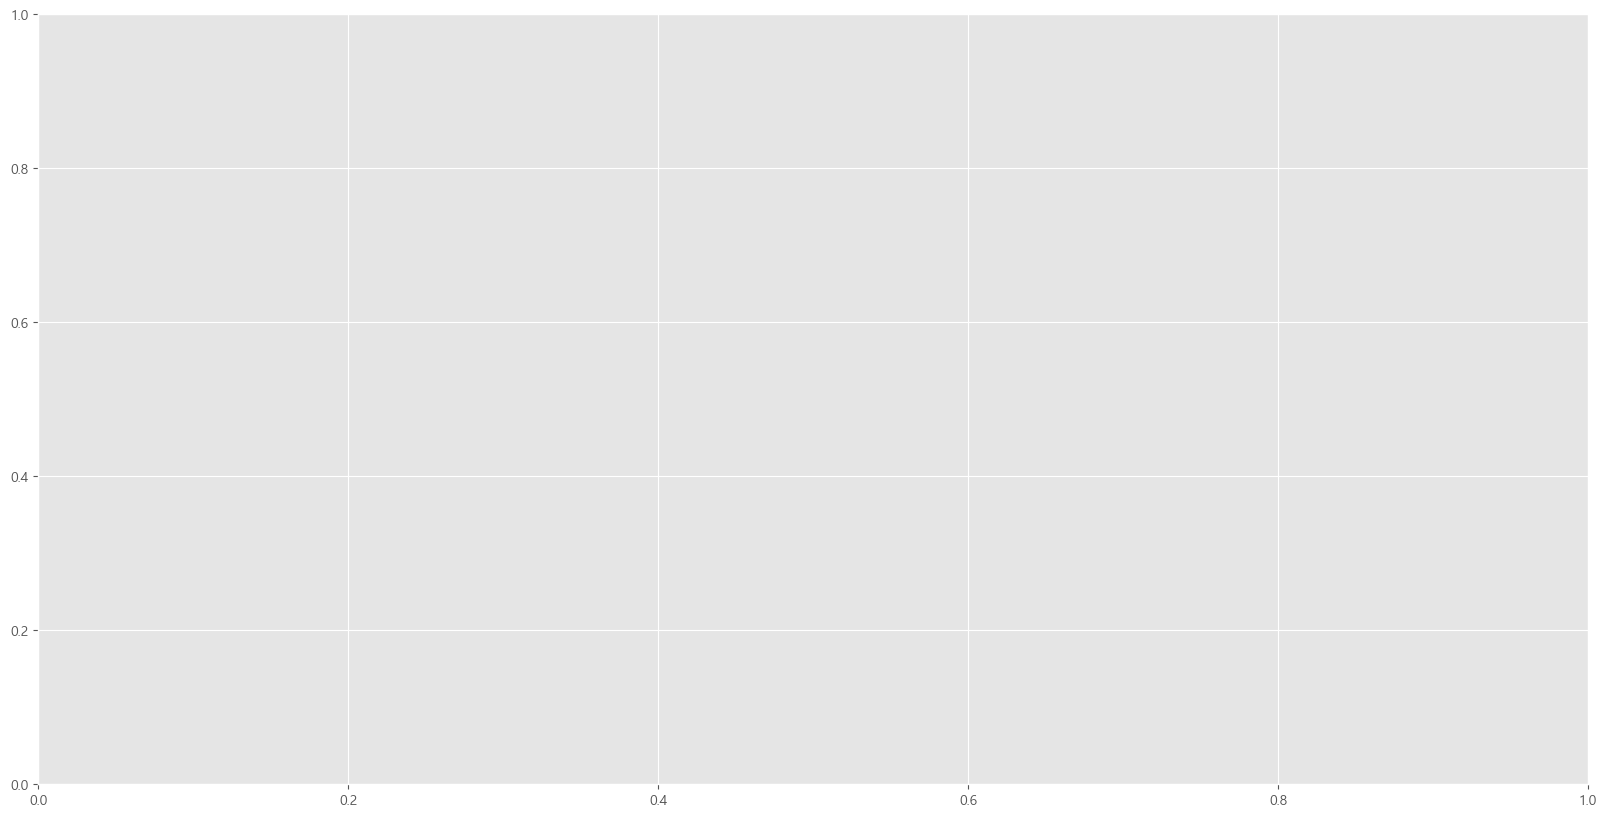

In [28]:
# 축 년도
col_years = list(map(str, range(1970, 2018)))
# to_choongnam = df_to_choongnam.loc['충남 유입량', :]
# choongnam_to = df_choongnam_to.loc['충남 유출량', :]

# 스타일 서식 지정
plt.style.use('ggplot')

# 그림 사이즈 지정(가로 14인치, 세로 5인치)
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1)

# ax_inflow = fig.add_subplot(1, 2, 1)
# ax_outflow = fig.add_subplot(1, 2, 2)

# # 색깔
# colorss = [ 'brown', 'red', 'coral', 'orangered', 'gold', 'yellow', 'greenyellow', 'yellowgreen', 'darkolivegreen', 'darkgreen', 'lightsteelblue', 'royalblue', 'blue', 'mediumpurple', 'blueviolet', 'violet']

# # axe 객체에 plot 함수로 '충남 유입량' 그래프 출력
# for i in range(len(colorss)):
#     ax_inflow.plot(col_years, df_to_choongnam.iloc[i], marker='', markerfacecolor=colorss[i],
#             markersize=5, color=colorss[i], linewidth=2, label=df_choongnam_to.iloc[i].name)
# # ax_inflow.plot(col_years, to_choongnam, marker='o', markerfacecolor='red',
# #        markersize=5, color='red', linewidth=2, label='총 유입량')

# # axe 객체에 plot 함수로 '충남 유출량' 그래프 출력
# for i in range(len(colorss)):
#     ax_outflow.plot(col_years, df_choongnam_to.iloc[i], marker='', markerfacecolor=colorss[i],
#             markersize=5, color=colorss[i], linewidth=2, label=df_to_choongnam.iloc[i].name)
# # ax_outflow.plot(col_years, choongnam_to, marker='o', markerfacecolor='skyblue',
# #         markersize=5, color='skyblue', linewidth=2, label='총 유입량')

# # 범례 표시
# ax_inflow.legend(loc='best')
# ax_outflow.legend(loc='best')

# # 차트 제목 추가
# ax_inflow.set_title('충남 인구 전출지별 유입량', size=20)
# ax_outflow.set_title('충남 인구 전입지별 유출량', size=20)

# # 축 이름 추가
# ax_inflow.set_xlabel('기간', size=12)
# ax_inflow.set_ylabel('인구수', size=12)
# ax_outflow.set_xlabel('기간', size=12)
# ax_outflow.set_ylabel('인구수', size=12)

# # 축 눈금 위치 지정
# ax_inflow.set_xticks(range(len(col_years)))
# ax_outflow.set_xticks(range(len(col_years)))

# # x축 눈금 라벨 회전하기
# ax_inflow.set_xticklabels(col_years, rotation=90)
# ax_outflow.set_xticklabels(col_years, rotation=90)

# # 축 눈금 레이블 크기
# ax_inflow.tick_params(axis='x', labelsize=10)
# ax_inflow.tick_params(axis='y', labelsize=10)
# ax_outflow.tick_params(axis='x', labelsize=10)
# ax_outflow.tick_params(axis='y', labelsize=10)

# plt.show()

In [32]:
def set_ax_options(ax, standard_location, location, col_years):
    ax.legend(loc='best')
    ax.set_title(f'{standard_location}, {location} 교류', size=20)
    ax.set_xlabel('기간', size=12)
    ax.set_ylabel('인구수', size=12)
    ax.set_xticks(range(len(col_years)))
    ax.set_xticklabels(col_years, rotation=90)
    ax.tick_params(axis='x', labelsize=10)
    ax.tick_params(axis='y', labelsize=10)
    return ax

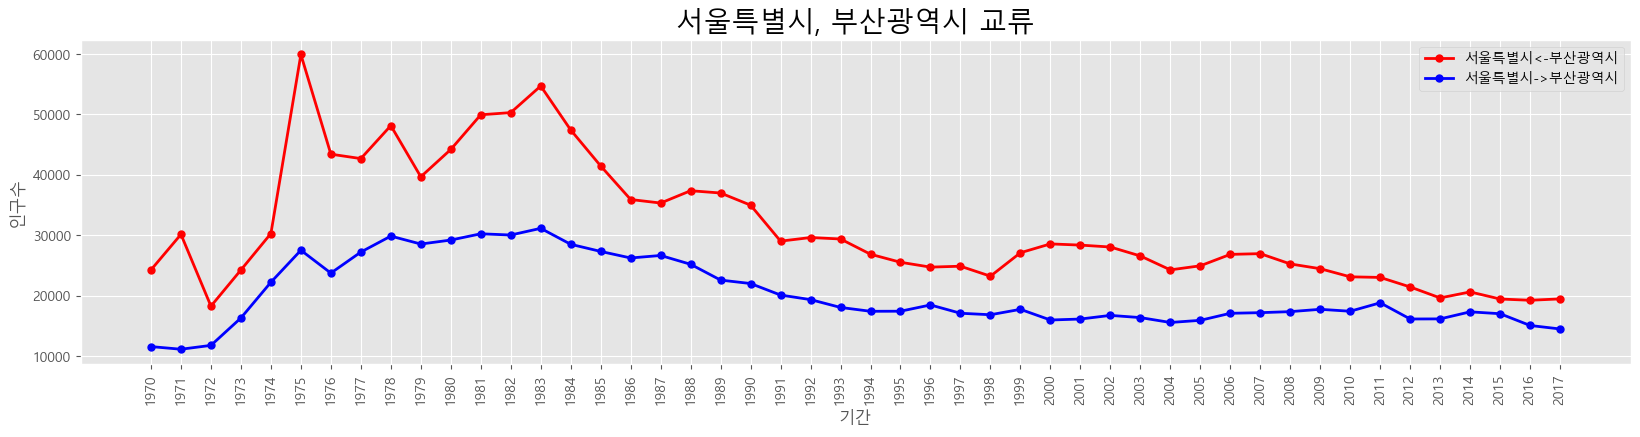

In [46]:
def draw_graph(standard_location, target_location, df, color1, color2, draw_type):
    mask = target_location != standard_location
    target_location = target_location[mask]
    if draw_type == 'by city':
        length = len(target_location)
    elif draw_type == 'by type':
        length = 2
    for loca in range(length):
        col_years = list(map(str, range(1970, 2018)))

        # 그림 사이즈 지정(가로 20인치, 세로 5*length인치)
        fig = plt.figure(figsize=(20, 5*length))
        ax = fig.add_subplot(length, 1, loca+1)
        
        mask_inflow = (df['전출지별'] == target_location[loca]) & (df['전입지별'] == standard_location)
        mask_outflow = (df['전출지별'] == standard_location) & (df['전입지별'] == target_location[loca])
        masks = [ mask_inflow, mask_outflow]
        colorss = [ color1, color2]
        directions = ['<-', '->']
        for i in range(2):
            df_change_amount = df[masks[i]]
            df_change_amount = df_change_amount.drop(['전입지별'], axis=1)
            df_change_amount = df_change_amount.rename({'전출지별' : '전출지'}, axis=1)
            df_change_amount = df_change_amount.set_index('전출지')
            # 빈칸 값 0으로 대체하기
            for j in range(len(df_change_amount.iloc[0])):
                if(df_change_amount.iloc[0,j] == '-'):
                    df_change_amount.iloc[0,j] = 0
            ax.plot(col_years, df_change_amount.iloc[0], marker='o', markerfacecolor=colorss[i],
                    markersize=5, color=colorss[i], linewidth=2, label=f'{standard_location}{directions[i]}{target_location[loca]}')

        ax = set_ax_options(ax, standard_location, target_location[loca], col_years)
        plt.show()

city_list = df_to_choongnam.index
draw_graph('서울특별시', city_list[:], df, 'red', 'blue', 'by city'`)



In [ ]:
def by_city_func(fig, length, order, col_years):
    col_years = list(map(str, range(1970, 2018)))
    ax = fig.add_subplot(length, 1, order)
    return ax

def by_type_func(ax, df, mask, color, col_years, standard_location, direction, target_location):
        df_change_amount = df[mask]
        df_change_amount = df_change_amount.drop(['전입지별'], axis=1)
        df_change_amount = df_change_amount.rename({'전출지별' : '전출지'}, axis=1)
        df_change_amount = df_change_amount.set_index('전출지')
        # 빈칸 값 0으로 대체하기
        for i in range(len(df_change_amount.iloc[0])):
            if(df_change_amount.iloc[0,i] == '-'):
                df_change_amount.iloc[0,i] = 0
        ax.plot(col_years, df_change_amount.iloc[0], marker='o', markerfacecolor=color,
                markersize=5, color=color, linewidth=2, label=f'{standard_location}{direction}{target_location}')
        return ax
    
    

def draw_graph(standard_location, target_location, df, color1, color2, draw_type):
    mask = target_location != standard_location
    target_location = target_location[mask]
    if draw_type == 'by city':
        length = len(target_location)
    elif draw_type == 'by type':
        length = 2
        
    # 그림 사이즈 지정(가로 20인치, 세로 5*length인치)
    fig = plt.figure(figsize=(20, 5*length))
    

    for loca in range(length):
        # 유입, 유출에따라 달라지는 자료
        mask_inflow = (df['전출지별'] == target_location[loca]) & (df['전입지별'] == standard_location)
        mask_outflow = (df['전출지별'] == standard_location) & (df['전입지별'] == target_location[loca])
        masks = [ mask_inflow, mask_outflow]
        colorss = [ color1, color2]
        directions = ['<-', '->']
        ax = by_city_func(fig, length, loca+1, col_years)
        for i in range(2):
            ax = by_type_func(ax, df, masks[i], colorss[i], col_years, standard_location, directions[i], target_location[loca])

        ax = set_ax_options(ax, standard_location, target_location[loca], col_years)
        plt.show()

city_list = df_to_choongnam.index
draw_graph('서울특별시', city_list[:], df, 'red', 'blue', 'by city')
